In [4]:
from drawdata import ScatterWidget

In [6]:
widget = ScatterWidget()
widget

ScatterWidget()

In [9]:
df = widget.data_as_polars

In [11]:
import polars as pl

df = df.with_columns(x=pl.col("x") * 1000)

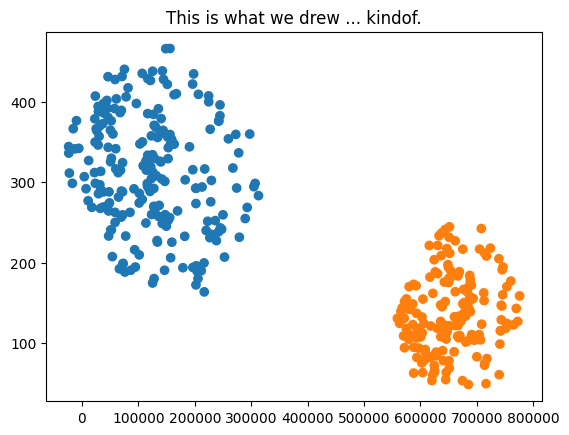

In [16]:
import matplotlib.pylab as plt

plt.scatter(df['x'], df['y'], c=df['color'])
plt.title("This is what we drew ... kindof.");

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe = make_pipeline(
    KNeighborsClassifier()
)

In [87]:
X, y = df.select('x', 'y').to_numpy(), df['color'].to_numpy()

pipe.fit(X, y)

Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())])

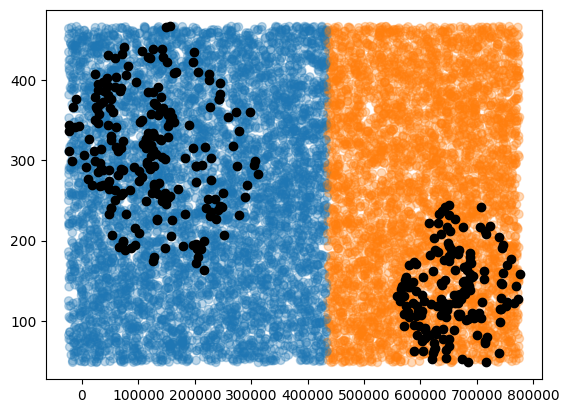

In [89]:
plt.scatter(X_in[:, 0], X_in[:, 1], c=pipe.predict(X_in), alpha=0.3)
plt.scatter(df['x'], df['y'], color='black')

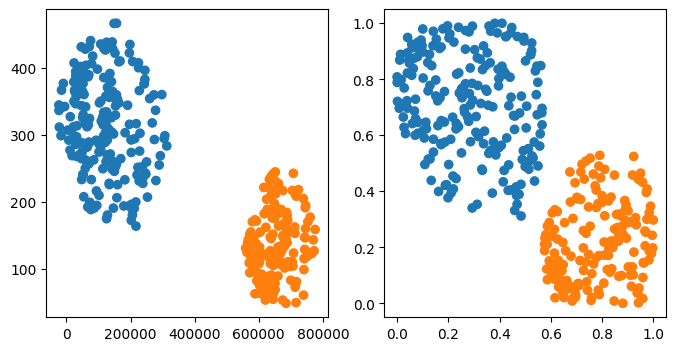

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X, y)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.subplot(1, 2, 2)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer


pipe1 = make_pipeline(
    KNeighborsClassifier()
)

pipe2 = make_pipeline(
    QuantileTransformer(n_quantiles=100),
    KNeighborsClassifier()
)

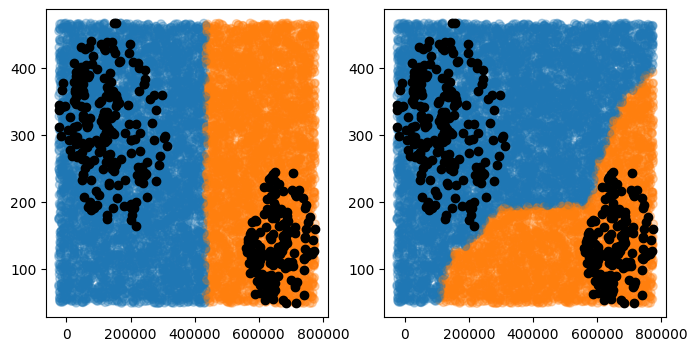

In [125]:
X_in = np.concatenate([
    np.random.uniform(X[:, 0].min(), X[:, 0].max(), (10_000, 1)),
    np.random.uniform(X[:, 1].min(), X[:, 1].max(), (10_000, 1)),
], axis=1)

pipe1.fit(X, y)
pipe2.fit(X, y)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_in[:, 0], X_in[:, 1], c=pipe1.predict(X_in), alpha=0.3)
plt.scatter(df['x'], df['y'], color='black')

plt.subplot(1, 2, 2)
plt.scatter(X_in[:, 0], X_in[:, 1], c=pipe2.predict(X_in), alpha=0.3)
plt.scatter(df['x'], df['y'], color='black');

Points to make:

- Explain how the standardscaler works, but also show the normaliser/quantiletransformer/minmax variants.
- Not every pipeline needs to have a scaler. Boosted trees are totally fine without it most of the time, but there are algorithms that appreciate it.
- This example hopefully paints a picture of the utility of scalers, but ... these are not always robust against outliers! Check the guide linked in the shownotes for more information on that.

Conclude by saying that in the next video we're going to zoom in on the standard scaler. The main might imply that it is "standard", and while it might feel that way ... there's a bunch of non-standard details under the hood!